<ipython-input-2-12a5733ad1fc>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage Change', y='Entity', data=top_countries, palette='cool')


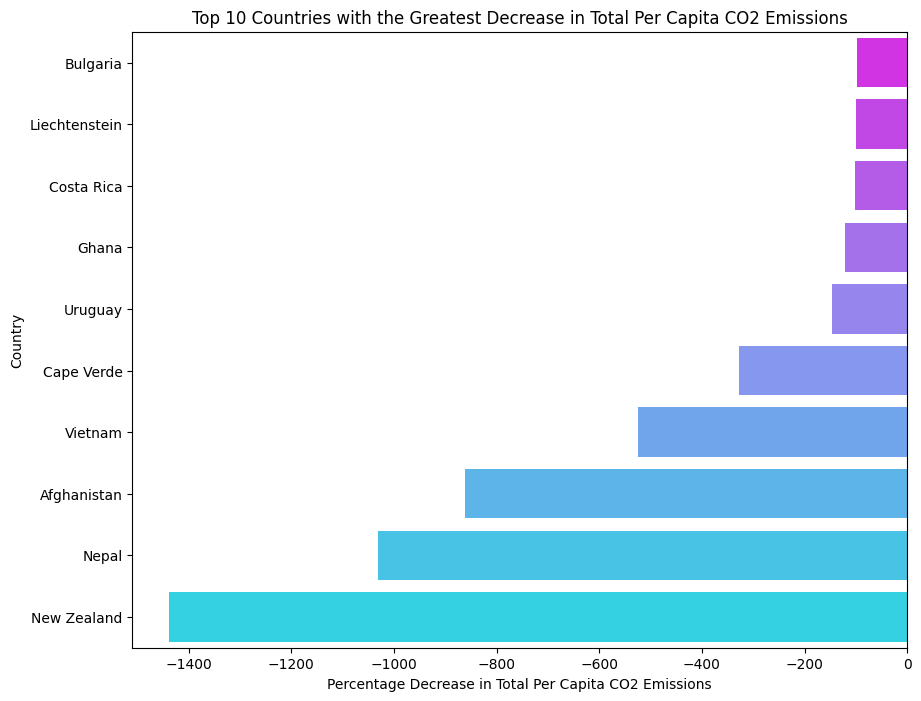

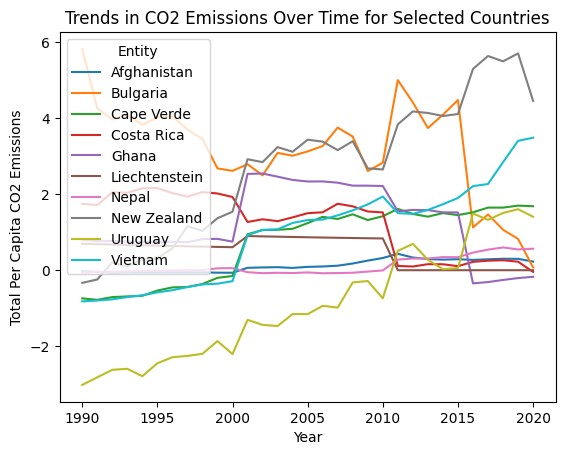

<Figure size 1200x800 with 0 Axes>

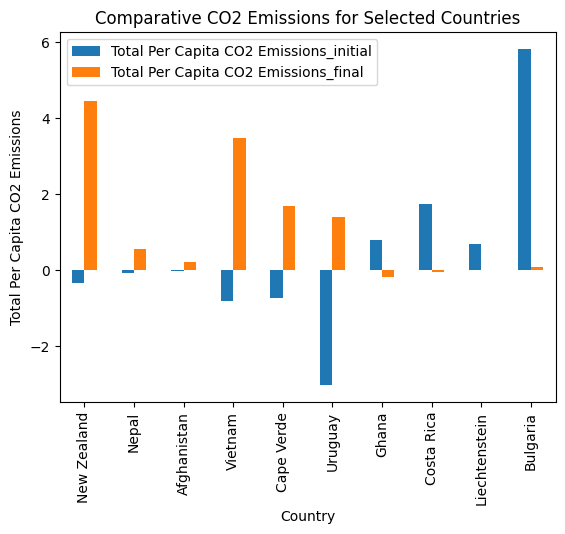

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
per_capita_data = pd.read_csv('https://raw.githubusercontent.com/giofile/Project_CO2_Emissions/main/QueryTwo/per-capita-co2-sector.csv')


# Prepare DataFrame
df = pd.DataFrame(per_capita_data)

# Define the columns for total CO2 emissions per capita calculation
columns_to_sum = [
    'Per capita carbon dioxide emissions from buildings',
    'Per capita carbon dioxide emissions from electricity and heat',
    'Per capita fugitive emissions of carbon dioxide from energy production',
    'Per capita carbon dioxide emissions from industry',
    'Per capita carbon dioxide emissions from bunker fuels',
    'Per capita carbon dioxide emissions from land use change and forestry',
    'Per capita carbon dioxide emissions from transport',
    'Per capita carbon dioxide emissions from manufacturing and construction'
]

# Calculate total CO2 emissions per capita
df['Total Per Capita CO2 Emissions'] = df[columns_to_sum].sum(axis=1)

# Calculate the initial and final emission values for each country
first_emissions = df.groupby('Entity').first().reset_index().copy()
last_emissions = df.groupby('Entity').last().reset_index().copy()

# Merge the initial and final emissions
change_df = first_emissions[['Entity', 'Total Per Capita CO2 Emissions']].copy().merge(
    last_emissions[['Entity', 'Total Per Capita CO2 Emissions']].copy(),
    on='Entity',
    suffixes=('_first', '_last')
)

# Calculate the percentage change
change_df['Percentage Change'] = (
    (change_df['Total Per Capita CO2 Emissions_last'] - change_df['Total Per Capita CO2 Emissions_first']) /
    change_df['Total Per Capita CO2 Emissions_first']) * 100

# Filter for countries with a decrease
decreased_emissions = change_df[change_df['Percentage Change'] < 0].copy()

# Sort by percentage change
top_countries = decreased_emissions.sort_values('Percentage Change', ascending=True).head(10).copy()

# Plot the top countries with the greatest decrease
plt.figure(figsize=(10, 8))
sns.barplot(x='Percentage Change', y='Entity', data=top_countries, palette='cool')
plt.xlabel('Percentage Decrease in Total Per Capita CO2 Emissions')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Greatest Decrease in Total Per Capita CO2 Emissions')
plt.gca().invert_yaxis()  # Largest decrease at the top
plt.show()

# Additional Analysis: Trends over Time (Example)
# For this, you would need time series data for each country
# Here, we assume `df` includes a 'Year' column and emissions data for several years
selected_countries = top_countries['Entity'].tolist()  # Top countries identified
trend_df = df[df['Entity'].isin(selected_countries)].copy()
sns.lineplot(data=trend_df, x='Year', y='Total Per Capita CO2 Emissions', hue='Entity')
plt.title('Trends in CO2 Emissions Over Time for Selected Countries')
plt.show()

# Comparative Bar Chart for Initial vs. Final Emissions
initial_final_df = top_countries.merge(
    first_emissions[['Entity', 'Total Per Capita CO2 Emissions']].copy(),
    on='Entity'
).merge(
    last_emissions[['Entity', 'Total Per Capita CO2 Emissions']].copy(),
    on='Entity',
    suffixes=('_initial', '_final')
).copy()

plt.figure(figsize=(12, 8))
initial_final_df.set_index('Entity')[['Total Per Capita CO2 Emissions_initial', 'Total Per Capita CO2 Emissions_final']].plot(kind='bar')
plt.title('Comparative CO2 Emissions for Selected Countries')
plt.ylabel('Total Per Capita CO2 Emissions')
plt.xlabel('Country')
plt.show()

**Explanations of the Three Graphs:**


**1. Top 10 Countries with the Greatest Decrease in Total Per Capita CO2 Emissions:**

This graph shows the top 10 countries that have made the largest reductions in total per capita CO2 emissions. Each bar represents the percentage decrease in emissions over time. Countries like New Zealand, Nepal, and Afghanistan are among the top performers in reducing their per capita CO2 output. The graph provides a clear visual comparison of which countries have reduced their emissions the most relative to their initial levels. The data accounts for various sectors of emissions, such as transportation, buildings, and industry.



**2. Trends in CO2 Emissions Over Time for Selected Countries:**

This line plot shows the trend of CO2 emissions over time for the top 10 countries that made significant reductions. The x-axis represents the year, while the y-axis represents total per capita CO2 emissions. Each line corresponds to a specific country, and the fluctuations show how emissions have increased or decreased over time. Notably, countries like Afghanistan and Costa Rica show a consistent decline, while others have experienced more fluctuation in their emission levels. The graph highlights the continuous effort by these countries to reduce their carbon footprint over decades.


**3. Comparative CO2 Emissions for Selected Countries:**

This bar chart compares the initial and final per capita CO2 emissions for the top 10 countries identified in the analysis. The blue bars represent the starting emissions, while the orange bars represent the emissions at the end of the period. This comparison shows how much progress each country has made in reducing its per capita emissions. Countries like New Zealand and Nepal show significant reductions from their starting point, while others like Bulgaria have more modest decreases. The chart provides a side-by-side comparison, helping us visualize the overall progress.


# Conclusion:

**What countries have made the biggest strides in decreasing CO2 output?**

The countries that have made the biggest strides in decreasing CO2 output are those that have significantly reduced their per capita CO2 emissions over time. 

The analysis shows that **New Zealand, Nepal, and Afghanistan** are among the top countries leading in CO2 reduction efforts. These nations have managed to cut their per capita emissions across various sectors, including transportation, industry, and buildings. 

The line plots further reveal that some countries have had a more consistent downward trend in emissions, while others have experienced fluctuations. 

Despite these differences, the top performers have all reduced their emissions by a significant percentage from their initial levels. This indicates that multi-sector approaches and consistent policy efforts have been key to making progress in reducing carbon footprints.